In [1]:
## --- plotting functions for website -------------------------------------------------------

# import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
%matplotlib inline 

In [2]:
# load scrapped data from 2005 to 2015
df = pd.read_csv("quarterly_gdp.csv", index_col="state")

In [4]:
## --- function to plot quarterly gdp

def plot_gdp_quarterly(df_gdp, state):
    
    p = plt.plot(df.loc[state], ls="solid", color="red", marker = 'o')
    
    # x axis
    plt.xlim((2004.9,2016.2)) # ??
    plt.xticks(range(2005,2016))
    
    # title
    title_text = state + " Quarterly GDP"
    plt.title(title_text, y=1.00, fontsize = 13) 
    
    # bar
    plt.bar(list(df.columns), list(df.loc[state]), width=0.1, alpha=0.2)
    
    return(p)

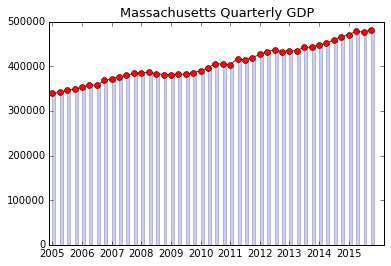

In [5]:
plot_gdp_quarterly(df, "Massachusetts")

In [6]:
# auxiliary function to get percent change appoximated by log difference of first lag
def get_pchange(df_gdp, state):
    lag1 = list(df_gdp.loc[state])[1::]
    lag0 = list(df_gdp.loc[state])[0:len(lag1)]
    percent_change = np.log(lag1) - np.log(lag0)
    return(percent_change * 100)

In [7]:
def plot_grate(df_gdp, state):
    pchange = get_pchange(df_gdp,state)
    p = plt.plot(df_gdp.columns[1:], pchange, ls="solid", color="red", marker = "o")
    
    # title
    title_text = state + " Quarterly GDP growth rate"
    plt.title(title_text, y=1.00, fontsize = 13)
    
    # x axis
    plt.xlim((2005,2016.2)) # ?? x lim diff when ploting df and series ???
    plt.xticks(range(2005,2016))
    
    # bar for rates
    plt.bar(list(df_gdp.columns[1:]), pchange, width=0.1, alpha=0.1)
    return(p)

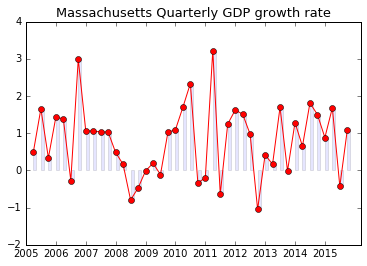

In [8]:
plot_grate(df, "Massachusetts")